# Meaning of this file

This code calculates which basins have complete data over a given period, from the Caravans_Multimet series 
The next script to run will be 'Choosing_Catchment_Sample'

In [1]:
import glob
import os
import itertools

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import xarray as xr
import zarr
import pickle


import sys
from pathlib import Path

functions_path = Path("/home/mokr/Loss_Functions_Paper/ML_Functions")
sys.path.append(str(functions_path))

from ML_Processing import check_streamflow_data, check_streamflow_data_recursively



ModuleNotFoundError: No module named 'streamflow_functions'

In [ ]:
# Basins_List[ 'hysets_0208735012']

from sklearn.model_selection import train_test_split
import numpy as np

# Split into 80% training+val, 20% testing

unwanted = ["hysets_05QA002", "hysets_0208735012"]

# Filter the valid list
filtered_basins = [b for b in Basins_List if b not in unwanted]

print(len(filtered_basins))
print(len(Basins_List))
train_val_basins, test_basins = train_test_split(filtered_basins, test_size=0.2, random_state=42)
# Second split: Split the train_val set into 87.5% train, 12.5% val, so we get 70,10,20
train_basins, val_basins = train_test_split(train_val_basins, test_size=0.125, random_state=42)

basin_splits = {
    'train': train_basins,
    'val': val_basins,
    'test': test_basins
}

import pickle

with open("/home/mokr/Loss_Functions_Paper/Catchment_Averaging/ML_basin_splits.pkl", "wb") as f:
    pickle.dump(basin_splits, f)

with open("/home/mokr/Loss_Functions_Paper/Catchment_Averaging/ML_basin_splits.txt", "w") as f:
    for basin in filtered_basins:
        f.write(f"{basin}\n")

In [3]:

from sklearn.model_selection import train_test_split
import numpy as np


with open('/home/mokr/Loss_Functions_Paper/Caravans_2016_2019_Basins.txt', 'r') as file:
    Suitable_Basins = file.readlines()
    # This includes newline characters at the end of each line
    Suitable_Basins = [line.strip() for line in Suitable_Basins]  # removes newline characters

Basins = set(path.split('/')[1] for path in Suitable_Basins)
Basins_List = list(Basins)


# Split into 80% training+val, 20% testing
train_val_basins, test_basins = train_test_split(Basins_List, test_size=0.2, random_state=42)
# Second split: Split the train_val set into 87.5% train, 12.5% val, so we get 70,10,20
train_basins, val_basins = train_test_split(train_val_basins, test_size=0.125, random_state=42)

train_basins

['hysets_06923950',
 'hysets_12201500',
 'hysets_01585230',
 'hysets_01031300',
 'hysets_01643000',
 'hysets_02323500',
 'hysets_07338750',
 'hysets_06468170',
 'hysets_12370000',
 'hysets_08070500',
 'hysets_05293000',
 'hysets_09494000',
 'hysets_09482000',
 'hysets_05497150',
 'hysets_05458900',
 'hysets_01589320',
 'hysets_04185000',
 'hysets_05411600',
 'camelsbr_60220000',
 'hysets_02MB010',
 'hysets_10234500',
 'hysets_14138870',
 'hysets_09066325',
 'hysets_06036905',
 'camelsbr_55330000',
 'hysets_06463500',
 'hysets_02375500',
 'hysets_12414900',
 'hysets_01017960',
 'hysets_05387440',
 'hysets_06895000',
 'hysets_02366000',
 'hysets_12201960',
 'hysets_01513500',
 'hysets_07186000',
 'hysets_01076500',
 'hysets_02467500',
 'hysets_06079000',
 'hysets_06712000',
 'hysets_02ED003',
 'hysets_07141900',
 'hysets_06404998',
 'hysets_03602500',
 'hysets_07074850',
 'hysets_03532000',
 'hysets_03596000',
 'hysets_05540275',
 'hysets_08HE009',
 'hysets_03QC002',
 'hysets_04060500',


In [2]:
ERA5_zarr_path = '/perm/mokr/Caravans_MultiMet/ERA5_LAND/timeseries.zarr'
ERA5_Land = xr.open_zarr(store=ERA5_zarr_path, chunks=None)
ERA5_Land.info

<bound method Dataset.info of <xarray.Dataset> Size: 37GB
Dimensions:                                             (basin: 22485,
                                                         date: 27333)
Coordinates:
  * basin                                               (basin) <U22 2MB 'cam...
  * date                                                (date) datetime64[ns] 219kB ...
Data variables: (12/15)
    era5land_dewpoint_temperature_2m                    (basin, date) float32 2GB ...
    era5land_potential_evaporation_DEPRECATED           (basin, date) float32 2GB ...
    era5land_potential_evaporation_FAO_PENMAN_MONTEITH  (basin, date) float32 2GB ...
    era5land_snow_depth_water_equivalent                (basin, date) float32 2GB ...
    era5land_surface_net_solar_radiation                (basin, date) float32 2GB ...
    era5land_surface_net_thermal_radiation              (basin, date) float32 2GB ...
    ...                                                  ...
    era5land_u_com

In [3]:
dates = ERA5_Land['date'][:]
date_array = pd.to_datetime(dates)

In [16]:
# Example usage
group = 'hysets'
directory = f"/perm/mokr/Caravans/Caravan/timeseries/csv/{group}/"
start_date = "2016-01-01"  # Replace with your desired start date
end_date = "2018-12-31"    # Replace with your desired end date

camels_valid_files, invalid_files = (directory, start_date, end_date)

# print(f"\nFiles with complete streamflow data ({len(valid_files)}):")
# for file in sorted(valid_files):
#     print(f"- {file}")

# print(f"\nFiles with missing streamflow data ({len(invalid_files)}):")
# for file in sorted(invalid_files):
#     print(f"- {file}")


In [ ]:
camels_valid_files

In [5]:
# lamah_valid_files = valid_files

In [12]:
if __name__ == "__main__":
    # Directory path should be the root folder containing all subfolders with CSV files
    directory_path = "/perm/mokr/Caravans/Caravan/timeseries/csv/"  # Current directory
    start_date = "2016-01-01"
    end_date = "2018-12-31"
    
    valid_files, invalid_files = check_streamflow_data_recursively(directory_path, start_date, end_date)

1000 stations processed
1000 stations processed
1000 stations processed
1000 stations processed
1000 stations processed
1000 stations processed
1000 stations processed
1000 stations processed
1000 stations processed
1000 stations processed
1000 stations processed
1000 stations processed


In [ ]:
valid_files

In [14]:
# camels_cl_valid_files = valid_files
# camels_br_valid_files = valid_files
# hysets_valid_files = valid_files


with open('/home/mokr/Loss_Functions_Paper/Catchment_Averaging/Caravans_2016_2019_Basins.txt', 'w') as file:
    file.write('\n'.join(valid_files))


# with open('/home/mokr/Loss_Functions_Paper/Catchment_Averaging/Caravans_2015_2017_Basins.txt', 'r') as file:
#     Suitable_Basins = file.readlines()
#     # This includes newline characters at the end of each line
#     Suitable_Basins = [line.strip() for line in Suitable_Basins]  # removes newline characters


# Plotting/Evaluation of Single Basin

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
Basin_Discharge = pd.read_csv(f'/perm/mokr/Caravans/Caravan/timeseries/csv/hysets/hysets_03320500.csv') #This is missing places like denmark
# Basin_Discharge = pd.read_csv(f'/perm/mokr/Caravans/Caravan/timeseries/csv/hysets/hysets_03320500 .csv') #This is missing places like denmark


Basin_Discharge_Dated = Basin_Discharge.set_index('date')
Basin_Discharge_Dated = Basin_Discharge_Dated[(Basin_Discharge_Dated.index >= '2016-01-01') & (Basin_Discharge_Dated.index <= '2018-12-31')]

In [3]:
Basin_Discharge_Subset = Basin_Discharge_Dated[(Basin_Discharge_Dated.index >= '2017-01-01') & (Basin_Discharge_Dated.index <= '2018-01-01')]

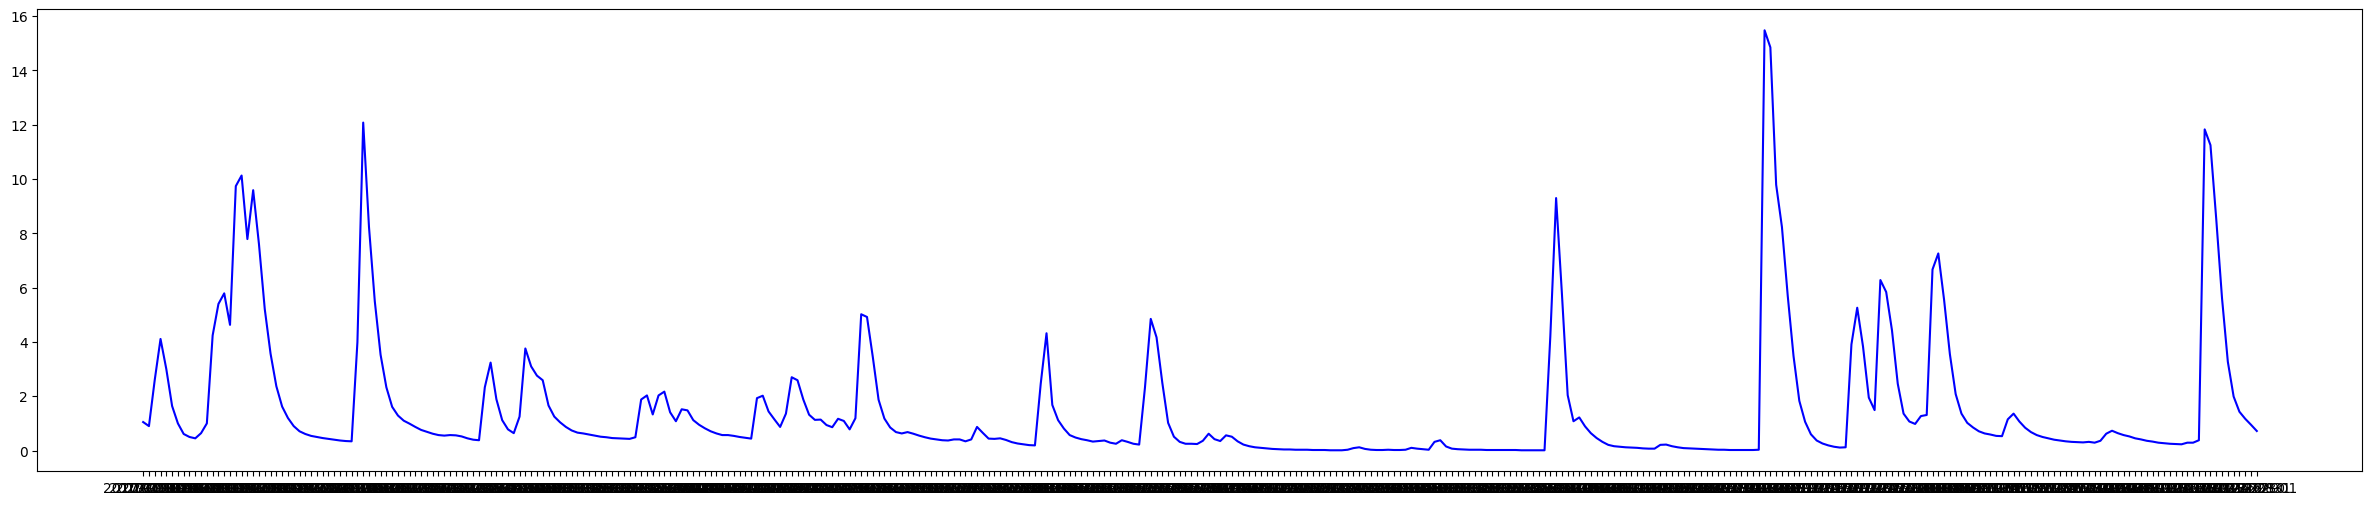

In [4]:
plt.figure(figsize=(30, 6))

plt.plot(Basin_Discharge_Subset['streamflow'][~Basin_Discharge_Subset['streamflow'].isna()], color='blue', label='Non-NaN Values')

In [7]:
Hysets = pd.read_csv('/perm/mokr/Caravans/Caravan/attributes/hysets/attributes_other_hysets.csv')

In [20]:
Validation_Set_America = Hysets[Hysets['gauge_id'].isin(basin_splits['test'])]
Validation_Set_America = Validation_Set_America[Validation_Set_America['country'] == 'United States of America']

Validation_Set_America.sort_values(by='area')

,gauge_id,gauge_name,country,gauge_lat,gauge_lon,area
1054,hysets_01589317,"TRIBUTARY TO DEAD RUN TRIBUTARY AT WOODLAWN, MD",United States of America,39.327000,-76.745139,1.057633
1203,hysets_01644371,"LITTLE SENECA CREEK TRIBUTARY NEAR CLARKSBURG, MD",United States of America,39.231495,-77.255817,1.062187
11941,hysets_14199704,"NATE CREEK TRIBUTARY NEAR COLTON, OR",United States of America,45.205233,-122.412002,1.612680
1053,hysets_01589316,"DEAD RUN TRIBUTARY NEAR WOODLAWN, MD",United States of America,39.318917,-76.750694,1.758160
136,hysets_01104475,"STONY BROOK RES., UNNAMED TRIB 1, NEAR WESTON, MA",United States of America,42.354541,-71.268112,1.956313
...,...,...,...,...,...,...
9357,hysets_09466500,"GILA RIVER AT CALVA, AZ.",United States of America,33.185613,-110.220090,29907.048374
6216,hysets_06214500,Yellowstone River at Billings MT,United States of America,45.800119,-108.468031,30528.453255
10624,hysets_11390500,SACRAMENTO R BL WILKINS SLOUGH NR GRIMES CA,United States of America,39.009895,-121.824690,36143.374060
5039,hysets_05330000,"MINNESOTA RIVER NEAR JORDAN, MN",United States of America,44.693018,-93.641902,42024.553098


In [11]:
file_path = '/home/mokr/Loss_Functions_Paper/Catchment_Averaging/ML_basin_splits.pkl'

with open(file_path, 'rb') as f:
    basin_splits = pickle.load(f)

# Explore contents
print(type(basin_splits))
print(basin_splits.keys())


<class 'dict'>
dict_keys(['train', 'val', 'test'])


In [14]:
## Strings of Missing Data
streamflow_column = Basin_Discharge['streamflow']
# Find the indices where NaN changes
nan_mask = streamflow_column.isna()
nan_changes = nan_mask.astype(int).diff()
# Find start and end of NaN blocks
nan_starts = nan_changes[nan_changes == 1].index
nan_ends = nan_changes[nan_changes == -1].index

# Handle edge cases
if nan_mask.iloc[0]:
    nan_starts = [0] + list(nan_starts)
if nan_mask.iloc[-1]:
    nan_ends = list(nan_ends) + [len(nan_mask)]

# Create list of NaN sections
nan_sections = []
for start, end in zip(nan_starts, nan_ends):
    nan_sections.append({
        'start': start, 
        'end': end, 
        'length': end - start
    })

# Print out the sections
for section in nan_sections:
    print(f"NaN Section: Start = {section['start']}, End = {section['end']}, Length = {section['length']} rows")

# Optionally, sort by length if you want to see the longest NaN sections first
nan_sections_sorted = sorted(nan_sections, key=lambda x: x['length'], reverse=True)

NaN Section: Start = 0, End = 10958, Length = 10958 rows
NaN Section: Start = 24472, End = 26662, Length = 2190 rows


In [10]:
Basin_Discharge_Y = Basin_Discharge_Dated['streamflow']
Basin_Discharge_Y.index = pd.to_datetime(Basin_Discharge_Y.index)
Basin_Discharge_Y = ((Basin_Discharge_Y - Basin_Discharge_Y.mean())/Basin_Discharge_Y.std())

valid_prediction_dates = pd.to_datetime(Basin_Discharge['date'][~Basin_Discharge['streamflow'].isna()])
valid_start_dates = valid_prediction_dates  - pd.Timedelta(days = 90)

In [67]:
import joblib
import numpy as np

# Path to the scaler file
scaler_path = '/home/mokr/Loss_Functions_Paper/Scalers/discharge_caravan_scalers.joblib'

# Load the scaler object
scaler = joblib.load(scaler_path)['streamflow']



In [71]:
scaler.mean_ 

array([1.36613297])

In [72]:
scaler.var_

array([26.00935452])